In [1]:
import tensorflow as tf
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)
import matplotlib.pyplot as plt
import os
import fileinput

In [2]:
train_df = pd.read_excel("data/spectrum_train.xls")
test_df = pd.read_excel("data/spectrum_test.xls")

In [3]:
train_df = pd.get_dummies(data=train_df,columns=["color" ])
test_df= pd.get_dummies(data=test_df,columns=["color" ])

In [4]:
train_df

,400,405,410,415,420,425,430,435,440,445,...,975,980,985,990,995,1000,color_1,color_2,color_3,color_4
0,0.000393,0.000349,0.000380,0.000430,0.000565,0.000733,0.000878,0.000903,0.000795,0.000730,...,2.334084e-05,4.631546e-05,0.000018,0.000024,0.000046,0.000066,0,1,0,0
1,0.000161,0.000154,0.000288,0.000453,0.000687,0.000930,0.001072,0.001066,0.000961,0.000862,...,2.144630e-04,2.288377e-04,0.000204,0.000195,0.000206,0.000208,0,1,0,0
2,0.000392,0.000345,0.000379,0.000435,0.000590,0.000755,0.000905,0.000940,0.000914,0.000769,...,1.043618e-04,1.563914e-04,0.000183,0.000186,0.000221,0.000248,0,1,0,0
3,0.000310,0.000308,0.000390,0.000523,0.000759,0.000998,0.001174,0.001160,0.000975,0.000759,...,2.817490e-07,6.190456e-05,0.000045,0.000071,0.000109,0.000143,0,1,0,0
4,0.000189,0.000201,0.000367,0.000564,0.000806,0.001025,0.001143,0.001086,0.000914,0.000736,...,1.361139e-04,1.905851e-04,0.000214,0.000259,0.000312,0.000356,0,1,0,0
5,0.000213,0.000075,0.000064,0.000133,0.000312,0.000547,0.000754,0.000889,0.000991,0.001086,...,4.262067e-05,9.629794e-05,0.000091,0.000114,0.000147,0.000182,0,1,0,0
6,0.000200,0.000263,0.000412,0.000591,0.000792,0.000907,0.000932,0.000811,0.000653,0.000415,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000045,0,1,0,0
7,0.000266,0.000206,0.000310,0.000475,0.000725,0.000936,0.001067,0.000991,0.000913,0.000789,...,5.208359e-05,1.096787e-04,0.000152,0.000192,0.000270,0.000336,0,1,0,0
8,0.000273,0.000323,0.000370,0.000406,0.000408,0.000373,0.000329,0.000299,0.000297,0.000265,...,1.238985e-04,1.154069e-04,0.000143,0.000113,0.000111,0.000118,1,0,0,0
9,0.000050,0.000167,0.000293,0.000379,0.000418,0.000410,0.000352,0.000293,0.000256,0.000188,...,3.040310e-05,1.226241e-05,0.000002,0.000000,0.000000,0.000000,1,0,0,0


In [5]:
test_df

,400,405,410,415,420,425,430,435,440,445,...,975,980,985,990,995,1000,color_1,color_2,color_3,color_4
0,0.000367,0.000356,0.000412,0.000473,0.000598,0.000734,0.000855,0.000893,0.000871,0.000786,...,0.000103,0.000162,0.000215,0.000238,0.000295,0.000345,0,1,0,0
1,0.000488,0.000583,0.000716,0.000844,0.000964,0.001057,0.001159,0.001160,0.001047,0.000888,...,0.000043,0.000091,0.000127,0.000141,0.000194,0.000241,0,1,0,0
2,0.000321,0.000362,0.000393,0.000401,0.000401,0.000408,0.000379,0.000342,0.000266,0.000185,...,0.000019,0.000016,0.000059,0.000031,0.000027,0.000028,1,0,0,0
3,0.000195,0.000253,0.000285,0.000313,0.000316,0.000306,0.000278,0.000281,0.000292,0.000286,...,0.000035,0.000010,0.000021,0.000000,0.000000,0.000000,1,0,0,0
4,0.002344,0.002372,0.002450,0.003055,0.004108,0.006480,0.013305,0.021684,0.034109,0.051087,...,0.000194,0.000333,0.000513,0.000644,0.000817,0.000968,0,0,1,0
5,0.002157,0.002380,0.002627,0.003164,0.003949,0.005762,0.011434,0.018480,0.029157,0.043697,...,0.000074,0.000143,0.000314,0.000398,0.000491,0.000581,0,0,1,0
6,0.000909,0.001011,0.001414,0.002339,0.003706,0.005860,0.009101,0.012844,0.017620,0.022455,...,0.000000,0.000005,0.000153,0.000157,0.000211,0.000267,0,0,0,1
7,0.001005,0.001241,0.001749,0.002756,0.004072,0.006086,0.009160,0.012817,0.017596,0.022537,...,0.000036,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,1


In [6]:
def PreprocessData(raw_df):    
    ndarray = raw_df.values
    Label = ndarray[:,121:125]
    Features = ndarray[:,0:121]    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    return scaledFeatures,Label

In [7]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

In [8]:
train_Features.shape

(32, 121)

In [9]:
test_Features.shape

(8, 121)

In [10]:
train_Features

array([[0.14455615, 0.11952238, 0.12496899, ..., 0.02566908, 0.04405398,
        0.05749672],
       [0.04661265, 0.03452927, 0.08851274, ..., 0.20868905, 0.19576739,
        0.18107006],
       [0.14445538, 0.11783285, 0.12463509, ..., 0.1991501 , 0.21045685,
        0.21531576],
       ...,
       [0.40571721, 0.49664676, 0.70569415, ..., 0.        , 0.        ,
        0.        ],
       [0.39906086, 0.55291616, 0.75528051, ..., 0.        , 0.        ,
        0.        ],
       [0.39165821, 0.50600081, 0.66293618, ..., 0.        , 0.        ,
        0.        ]])

In [11]:
train_Label

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [17]:
model = tf.keras.Sequential()

In [18]:
model.add(tf.keras.layers.Dense(units=1000, input_dim=121, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

In [19]:
model.add(tf.keras.layers.Dense(units=1000, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

In [20]:
model.add(tf.keras.layers.Dense(units=4, 
                kernel_initializer='normal', 
                activation='softmax'))

In [21]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1000)              122000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 4004      
Total params: 1,127,004
Trainable params: 1,127,004
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [23]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=14, 
                         batch_size=2,verbose=2)

Train on 28 samples, validate on 4 samples
Epoch 1/14
28/28 - 1s - loss: 1.4920 - accuracy: 0.5000 - val_loss: 2.6448 - val_accuracy: 0.0000e+00
Epoch 2/14
28/28 - 0s - loss: 0.2185 - accuracy: 0.9286 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 3/14
28/28 - 0s - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 4/14
28/28 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 5/14
28/28 - 0s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 6/14
28/28 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 7/14
28/28 - 0s - loss: 3.1796e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 8/14
28/28 - 0s - loss: 7.5888e-04 - accuracy: 1.0000 - val_loss: 9.4509e-04 - val_accuracy: 1.0000
Epoch 9/14
28/28 - 0s - loss: 2.4364e-04 - accuracy: 1.0000 - val_loss: 6.1836e-04 - val_accuracy: 1.0000
Epoch 10/14
28/28 - 0s - loss: 2.0559e-04 - accurac

In [24]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='lower right')
    plt.show()

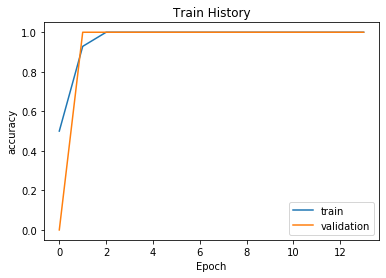

In [25]:
show_train_history(train_history,'accuracy','val_accuracy')

In [26]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

8/1 [================================================================================================================================================================================================================================================] - 0s 19ms/sample - loss: 2.0772e-05 - accuracy: 1.0000


In [27]:
scores[1]

1.0

In [28]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [30]:
open("spectrum_color_detection.tflite", "wb").write(tflite_model)

4509636